# RSSI vs Tiempo

In [1]:
# Imports
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import math
%matplotlib inline

## Con raspberry Pi 2 , usando Ruta 2 (de datos simulacion en tiempo real)

In [2]:
#Leer CSV posicion 1 Tx 0x01 toma 1
t01_t1 = pd.read_csv('./raspRutas/Tx0x01/Ruta2/t1/t1', delim_whitespace=True, names=['Fecha','Hora','Be07','Be08','Be09','Be10','Be11'])

In [3]:
#Leer CSV posicion 1 Tx 0x01 toma 2
t01_t2 = pd.read_csv('./raspRutas/Tx0x01/Ruta2/t2/t1', delim_whitespace=True, names=['Fecha','Hora','Be07','Be08','Be09','Be10','Be11'])

0     -56.313433
1     -56.313433
2     -56.313433
3     -56.313433
4     -56.313433
5     -56.313433
6     -56.313433
7     -56.313433
8     -56.313433
9     -56.313433
10    -56.313433
11    -56.313433
12    -56.313433
13    -56.313433
14    -56.313433
15    -56.313433
16    -56.313433
17    -56.313433
18    -56.313433
19    -56.313433
20    -56.313433
21    -56.313433
22    -56.313433
23    -56.313433
24    -56.313433
25    -56.313433
26    -56.313433
27    -56.313433
28    -56.313433
29    -56.313433
         ...    
220   -56.313433
221   -56.313433
222   -56.313433
223   -56.313433
224   -56.313433
225   -56.313433
226   -56.313433
227   -56.313433
228   -56.313433
229   -56.313433
230   -56.313433
231   -56.313433
232   -56.313433
233   -56.313433
234   -56.313433
235   -56.313433
236   -56.313433
237   -56.313433
238   -56.313433
239   -56.313433
240   -56.313433
241   -56.313433
242   -56.313433
243   -56.313433
244   -56.313433
245   -56.313433
246   -56.313433
247   -56.3134

In [4]:
t01_t2.head(10)

,Fecha,Hora,Be07,Be08,Be09,Be10,Be11
0,2016-05-19,23:38:16.918718,-51.0,-55.0,-61.0,-59.0,-53.0
1,2016-05-19,23:38:17.121748,-52.0,-59.0,-67.0,-58.0,-50.0
2,2016-05-19,23:38:17.224758,-60.0,-54.0,-62.0,-59.0,-57.0
3,2016-05-19,23:38:17.329772,-67.0,-62.0,-65.0,-56.0,-56.0
4,2016-05-19,23:38:17.544800,-52.0,-64.0,-65.0,-64.0,-60.0
5,2016-05-19,23:38:17.648873,-65.0,-63.0,-62.0,-51.0,-52.0
6,2016-05-19,23:38:17.752823,-50.0,-61.0,-75.0,-55.0,-52.0
7,2016-05-19,23:38:17.857838,-63.0,-50.0,-64.0,-59.0,-60.0
8,2016-05-19,23:38:17.967853,-66.0,-54.0,-75.0,-63.0,-59.0
9,2016-05-19,23:38:18.165880,-54.0,-63.0,-63.0,-63.0,-52.0


In [14]:
# Plotear datos
# t01_t1['Be07']
#t01_t2['Be07'].plot()
tavg = pd.Series([t01_t1['Be07'].mean() for i in range(250)])
t2avg = pd.Series([t01_t2['Be07'].mean() for i in range(250)])
df = pd.concat([t01_t1['Be07'],tavg, t01_t2['Be07'], t2avg], axis=1, keys=['Take 1','Take 1 avg', 'Take 2', 'Take 2 avg'])


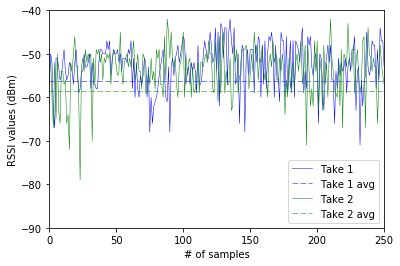

In [28]:
plt.figure();
fig = df.plot(lw=0.5, markersize=0.5, title='', style=['b','b--','g','g--']);
fig.set_xlabel("# of samples");
fig.set_ylabel("RSSI values (dBm)");
fig.set_ylim(-90,-40)
fig.set_xlim(0,250)
plt.savefig('test.png',format='png',dpi=1000)

In [2]:
def mkdir_p(mypath):
    '''Creates a directory. equivalent to using mkdir -p on the command line'''

    from errno import EEXIST
    from os import makedirs,path

    try:
        makedirs(mypath)
    except OSError as exc: # Python >2.5
        if exc.errno == EEXIST and path.isdir(mypath):
            pass
        else: raise

In [31]:
### Funcion para plotear datos de 5 Beacons
def plotAllBeacons(pot, pos, take1, take2):
    all_beacons = ['Be07','Be08','Be09','Be10','Be11']
    for beacon in all_beacons:
        tk1 = take1[beacon][0:250]
        tk2 = take2[beacon][0:250]
        tk1avg = pd.Series([tk1.mean() for i in range(250)])
        tk2avg = pd.Series([tk2.mean() for i in range(250)])
        df = pd.concat([tk1,tk1avg,tk2, tk2avg], axis=1, keys=['Take 1','Take 1 avg','Take 2','Take 2 avg'])
        plt.figure()
        fig = df.plot(lw=0.5, markersize=0.5, title='', style=['b','b--','g','g--']);
        fig2 = fig.get_figure()
        #fig.set_xlabel("Time (s)");
        fig.set_xlabel("# of samples");
        fig.set_ylabel("RSSI values (dBm)");
        fig.set_ylim(-100,-50)
        fig.set_xlim(0,250)
        output_dir = 'resulsRaspberry/'+pot+'/'+pos 
        mkdir_p(output_dir)
        plt.savefig(output_dir+'/'+beacon+'.eps',format='eps',dpi=1000)
        plt.close(fig2)
        

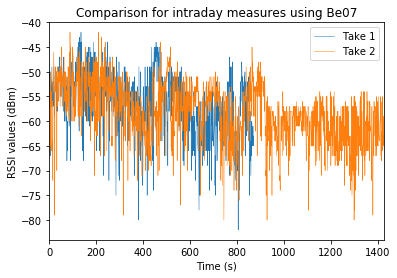

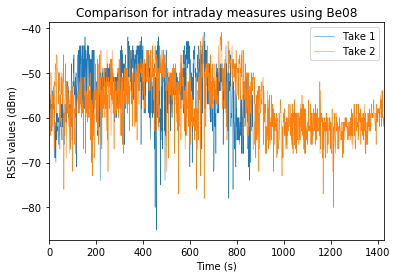

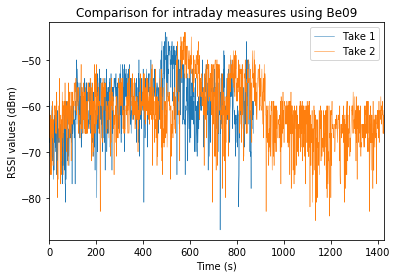

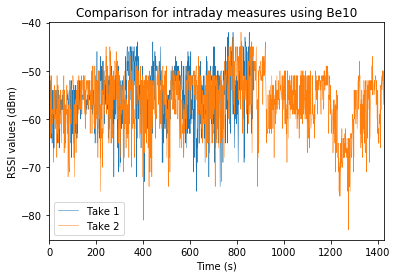

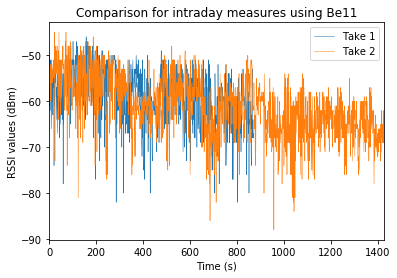

In [71]:
plotAllBeacons('Tx0x01', 't1', t01_t1,t01_t2)

In [32]:
# leer datos para todas las posiciones
potencias = list('123456')
all_potencias = [ 'Tx0x0'+potencia for potencia in potencias]
all_posiciones = ['t'+str(i) for i in range(1,18)]

for potencia in all_potencias:
    ruta1 = './raspRutas/'+potencia+'/Ruta2/t1/'
    ruta2 = './raspRutas/'+potencia+'/Ruta2/t2/'
    for pos in all_posiciones:
        take1 = pd.read_csv(ruta1+pos, delim_whitespace=True, names=['Fecha','Hora','Be07','Be08','Be09','Be10','Be11']) 
        take2 = pd.read_csv(ruta2+pos, delim_whitespace=True, names=['Fecha','Hora','Be07','Be08','Be09','Be10','Be11']) 
        tam1 = take1['Be07'].count()
        tam2 = take2['Be07'].count()
        tam_min = min(tam1,tam2)
        take1 = take1.head(tam_min)
        take2 = take2.head(tam_min)
        plotAllBeacons(potencia, pos+'', take1,take2)

/home/jeslev/anaconda3/lib/python3.6/site-packages/matplotlib/pyplot.py:524: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  max_open_warning, RuntimeWarning)


## Con celular , usando 3 medidas en zona 2 (15 puntos)

In [3]:
#Leer CSV  Tx 0x01 toma 1
t01_t1 = pd.read_csv('./Movil/Tx_0x04/Tx04_1.csv', names=[i for i in range(1,3000)],skiprows=2)

In [4]:
data = t01_t1.transpose() # cada columna es una posicion del 1 al 15

In [5]:
data

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14
1,Be07Be08Be09Be10Be11,Be07Be08Be09Be10Be11,Be07Be08Be09Be10Be11,Be07Be08Be09Be10Be11,Be07Be08Be09Be10Be11,Be07Be08Be09Be10Be11,Be07Be08Be09Be10Be11,Be07Be08Be09Be10Be11,Be07Be08Be09Be10Be11,Be07Be08Be09Be10Be11,Be07Be08Be09Be10Be11,Be07Be08Be09Be10Be11,Be07Be08Be09Be10Be11,Be07Be08Be09Be10Be11,Be07Be08Be09Be10Be11
2,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15
3,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
4,-87,-83,-83,-82,-83,-83,-72,-76,-83,-81,-82,-75,-72,-73,-79
5,-88,-80,-84,-84,-79,-87,-73,-76,-79,-79,-78,-75,-73,-70,-79
6,-90,-76,-82,-83,-80,-80,-70,-69,-84,-79,-77,-73,-72,-69,-79
7,-89,-72,-83,-78,-82,-83,-70,-73,-82,-75,-77,-72,-75,-69,-79
8,-88,-73,-84,-75,-81,-81,-68,-73,-78,-68,-76,-75,-75,-70,-80
9,-91,-77,-84,-75,-84,-81,-68,-74,-80,-67,-75,-76,-73,-70,-81
10,-86,-74,-89,-76,-93,-80,-68,-70,-79,-67,-81,-76,-71,-71,-81


In [6]:
data2 = data[0][3:] # toma la posicion 1, desde la 3ra fila , las 2 primeras es basura

In [7]:
#data2.iloc[::5]
data3 = data2.as_matrix() # lo convierte a matriz

In [8]:
data3= [v for v in data3 if not math.isnan(v)] # elimina valores NaN

In [9]:
data3

[-87,
 -88,
 -90,
 -89,
 -88,
 -91,
 -86,
 -82,
 -84,
 -86,
 -81,
 -79,
 -80,
 -79,
 -80,
 -81,
 -80,
 -80,
 -80,
 -80,
 -80,
 -85,
 -87,
 -85,
 -85,
 -85,
 -85,
 -86,
 -85,
 -85,
 -86,
 -86,
 -84,
 -85,
 -86,
 -85,
 -86,
 -84,
 -85,
 -85,
 -85,
 -84,
 -85,
 -86,
 -86,
 -83,
 -81,
 -80,
 -80,
 -80,
 -80,
 -80,
 -80,
 -80,
 -81,
 -81,
 -81,
 -80,
 -81,
 -81,
 -81,
 -80,
 -81,
 -80,
 -81,
 -80,
 -80,
 -81,
 -82,
 -80,
 -80,
 -81,
 -80,
 -80,
 -80,
 -80,
 -79,
 -79,
 -78,
 -78,
 -80,
 -78,
 -78,
 -80,
 -78,
 -78,
 -78,
 -85,
 -85,
 -84,
 -83,
 -85,
 -85,
 -84,
 -85,
 -84,
 -86,
 -84,
 -84,
 -84,
 -85,
 -85,
 -86,
 -85,
 -86,
 -85,
 -86,
 -83,
 -83,
 -84,
 -86,
 -84,
 -85,
 -86,
 -80,
 -80,
 -82,
 -80,
 -80,
 -80,
 -80,
 -80,
 -80,
 -80,
 -80,
 -80,
 -80,
 -81,
 -80,
 -81,
 -80,
 -80,
 -81,
 -80,
 -80,
 -81,
 -80,
 -80,
 -80,
 -80,
 -81,
 -80,
 -80,
 -80,
 -81,
 -80,
 -80,
 -80,
 -80,
 -80,
 -80,
 -80,
 -81,
 -80,
 -80,
 -81,
 -80,
 -79,
 -79,
 -78,
 -78,
 -79,
 -79,
 -78,
 -79,
 -79,
 -78

In [10]:
data4 = [ [j for j in data3[i::5] ] for i in range(5)] # filtra por cada beacon (cada 5)

In [11]:
len(data3)

1425

In [12]:
data4[3]# RSSI del beacon 07 (1) para posicion 1

[-89,
 -84,
 -79,
 -80,
 -85,
 -85,
 -85,
 -85,
 -86,
 -80,
 -80,
 -81,
 -80,
 -82,
 -80,
 -78,
 -80,
 -85,
 -84,
 -84,
 -85,
 -83,
 -86,
 -80,
 -80,
 -80,
 -80,
 -80,
 -80,
 -80,
 -80,
 -79,
 -78,
 -80,
 -79,
 -85,
 -86,
 -85,
 -85,
 -85,
 -85,
 -84,
 -84,
 -80,
 -80,
 -80,
 -81,
 -80,
 -80,
 -78,
 -78,
 -78,
 -78,
 -84,
 -87,
 -89,
 -84,
 -85,
 -85,
 -75,
 -76,
 -75,
 -74,
 -74,
 -74,
 -74,
 -83,
 -83,
 -82,
 -83,
 -82,
 -75,
 -75,
 -75,
 -73,
 -74,
 -72,
 -73,
 -73,
 -73,
 -82,
 -82,
 -82,
 -82,
 -85,
 -82,
 -84,
 -82,
 -75,
 -75,
 -77,
 -76,
 -72,
 -74,
 -74,
 -73,
 -73,
 -73,
 -74,
 -76,
 -82,
 -82,
 -82,
 -83,
 -83,
 -82,
 -76,
 -76,
 -76,
 -77,
 -74,
 -73,
 -73,
 -73,
 -82,
 -83,
 -81,
 -81,
 -86,
 -87,
 -85,
 -85,
 -85,
 -78,
 -78,
 -78,
 -78,
 -78,
 -80,
 -80,
 -82,
 -85,
 -85,
 -86,
 -87,
 -86,
 -87,
 -78,
 -77,
 -78,
 -78,
 -79,
 -78,
 -78,
 -78,
 -81,
 -81,
 -81,
 -82,
 -88,
 -88,
 -87,
 -87,
 -87,
 -86,
 -86,
 -83,
 -78,
 -78,
 -79,
 -78,
 -79,
 -78,
 -81,
 -81,
 -81,
 -80

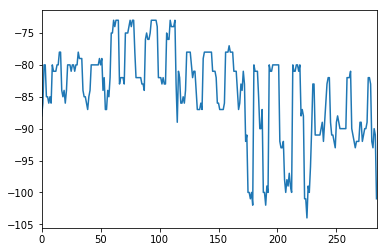

In [13]:
pd.Series(data4[4]).plot()

In [21]:
### Funcion para plotear datos de 5 Beacons
def plotBeaconRSSI(pot, pos, beacon,take1, take2,take3):
    tk1 = take1[0:250]
    tk2 = take2[0:250]
    tk3 = take3[0:250]
    tk1avg = pd.Series([tk1.mean() for i in range(250)])
    tk2avg = pd.Series([tk2.mean() for i in range(250)])
    tk3avg = pd.Series([tk3.mean() for i in range(250)])
    df = pd.concat([tk1,tk1avg,tk2, tk2avg,tk3,tk3avg], axis=1, keys=['Take 1','Take 1 avg','Take 2','Take 2 avg','Take 3','Take 3 avg'])
    
    
    #df = pd.concat([take1,take2,take3], axis=1, keys=['Take 1','Take 2', 'Take 3'])
    plt.figure()
    fig = df.plot(lw=0.5, markersize=0.4, title='Comparison for intraday measures using '+beacon, style=['b','b--','g','go-','r','r^-']);
    fig2 = fig.get_figure()
    #fig.set_xlabel("Time (s)");
    fig.set_xlabel("# of samples");
    fig.set_ylabel("RSSI values (dBm)");
    fig.set_ylim(-110,-65)
    fig.set_xlim(0,225)
    output_dir = 'resultsMovilNaN/'+pot+'/'+str(pos+1) 
    mkdir_p(output_dir)
    plt.savefig(output_dir+'/'+beacon+'.eps',format='eps',dpi=1000)
    plt.close(fig2)

In [24]:
def combineBeaconsProc():
    potencias = list('123456')
    all_potencias = [ ('Tx_0x0'+potencia, 'Tx0'+potencia) for potencia in potencias]
    all_beacons = ['Be07','Be08','Be09','Be10','Be11']
    #Leer CSV  Tx 0x0A toma B
    for potencia,archivo in all_potencias:
        t1 = pd.read_csv('./Movil/'+potencia+'/'+archivo+'_1.csv', names=[i for i in range(1,3000)],skiprows=2).transpose()
        t2 = pd.read_csv('./Movil/'+potencia+'/'+archivo+'_2.csv', names=[i for i in range(1,3000)],skiprows=2).transpose()
        t3 = pd.read_csv('./Movil/'+potencia+'/'+archivo+'_3.csv', names=[i for i in range(1,3000)],skiprows=2).transpose()
        for posicion in range(15):
            # toma la posicion, desde la 3ra fila , las 2 primeras es basura, transforma a matrix y elimina NaNs
            #data1 = [v for v in t1[posicion][3:].as_matrix() if not math.isnan(v)]
            #data2 = [v for v in t2[posicion][3:].as_matrix() if not math.isnan(v)]
            #data3 = [v for v in t3[posicion][3:].as_matrix() if not math.isnan(v)]
            data1 = t1[posicion][3:].as_matrix()
            data2 = t2[posicion][3:].as_matrix()
            data3 = t3[posicion][3:].as_matrix()
            
            # filtra por cada beacon (cada 5)
            take1 = [ [j for j in data1[i::5] ] for i in range(5)]
            take2 = [ [j for j in data2[i::5] ] for i in range(5)]
            take3 = [ [j for j in data3[i::5] ] for i in range(5)]
            
            #itera para cada Beacon
            for beacon in range(5):
                take1_df = pd.Series(take1[beacon])
                take2_df = pd.Series(take2[beacon])
                take3_df = pd.Series(take3[beacon])
                
                #Iguala tamaños
                tam1 = take1_df.count()
                tam2 = take2_df.count()
                tam3 = take3_df.count()
                tam_min = min(tam1,tam2,tam3)
                take1_df = take1_df.head(tam_min)
                take2_df = take2_df.head(tam_min)
                take3_df = take3_df.head(tam_min)
                plotBeaconRSSI(potencia, posicion, all_beacons[beacon], take1_df, take2_df, take3_df)
                

In [29]:
def combineBeaconsProc2(): #Datos varianzas takes 1,2,3, dev std, mean , 0x04, Be07
    potencias = list('4')
    all_potencias = [ ('Tx_0x0'+potencia, 'Tx0'+potencia) for potencia in potencias]
    all_beacons = ['Be07']
    #Leer CSV  Tx 0x0A toma B
    for potencia,archivo in all_potencias:
        t1 = pd.read_csv('./Movil/'+potencia+'/'+archivo+'_1.csv', names=[i for i in range(1,3000)],skiprows=2).transpose()
        t2 = pd.read_csv('./Movil/'+potencia+'/'+archivo+'_2.csv', names=[i for i in range(1,3000)],skiprows=2).transpose()
        t3 = pd.read_csv('./Movil/'+potencia+'/'+archivo+'_3.csv', names=[i for i in range(1,3000)],skiprows=2).transpose()
        for posicion in range(15):
            # toma la posicion, desde la 3ra fila , las 2 primeras es basura, transforma a matrix y elimina NaNs
            #data1 = [v for v in t1[posicion][3:].as_matrix() if not math.isnan(v)]
            #data2 = [v for v in t2[posicion][3:].as_matrix() if not math.isnan(v)]
            #data3 = [v for v in t3[posicion][3:].as_matrix() if not math.isnan(v)]
            data1 = t1[posicion][3:].as_matrix()
            data2 = t2[posicion][3:].as_matrix()
            data3 = t3[posicion][3:].as_matrix()
            
            # filtra por cada beacon (cada 5)
            k = 1
            take1 = [ [j for j in data1[i::k] ] for i in range(k)]
            take2 = [ [j for j in data2[i::k] ] for i in range(k)]
            take3 = [ [j for j in data3[i::k] ] for i in range(k)]
            
            #itera para cada Beacon
            for beacon in range(k):
                take1_df = pd.Series(take1[beacon])
                take2_df = pd.Series(take2[beacon])
                take3_df = pd.Series(take3[beacon])
                
                #Iguala tamaños
                tam1 = take1_df.count()
                tam2 = take2_df.count()
                tam3 = take3_df.count()
                tam_min = min(tam1,tam2,tam3)
                take1_df = take1_df.head(tam_min)
                take2_df = take2_df.head(tam_min)
                take3_df = take3_df.head(tam_min)
                print(posicion+1)
                #print([np.mean(take1_df), np.std(take1_df)])
                #print([np.mean(take2_df), np.std(take2_df)])
                #print([np.mean(take3_df), np.std(take3_df)])
                print([np.min(take1_df), np.max(take1_df)])
                print([np.min(take2_df), np.max(take2_df)])
                print([np.min(take3_df), np.max(take3_df)])
                

In [30]:
combineBeaconsProc2()

1
[-106.0, -72.0]
[-109.0, -72.0]
[-105.0, -73.0]
2
[-102.0, -72.0]
[-99.0, -69.0]
[-103.0, -70.0]
3
[-108.0, -76.0]
[-108.0, -80.0]
[-105.0, -74.0]
4
[-105.0, -68.0]
[-97.0, -69.0]
[-98.0, -69.0]
5
[-99.0, -67.0]
[-100.0, -70.0]
[-101.0, -72.0]
6
[-104.0, -74.0]
[-108.0, -71.0]
[-94.0, -72.0]
7
[-110.0, -66.0]
[-105.0, -67.0]
[-107.0, -69.0]
8
[-107.0, -68.0]
[-106.0, -67.0]
[-106.0, -68.0]
9
[-105.0, -73.0]
[-110.0, -75.0]
[-109.0, -68.0]
10
[-106.0, -64.0]
[-105.0, -72.0]
[-96.0, -71.0]
11
[-109.0, -71.0]
[-104.0, -68.0]
[-103.0, -70.0]
12
[-106.0, -67.0]
[-110.0, -68.0]
[-107.0, -67.0]
13
[-110.0, -64.0]
[-106.0, -68.0]
[-110.0, -68.0]
14
[-106.0, -65.0]
[-108.0, -64.0]
[-104.0, -65.0]
15
[-109.0, -70.0]
[-101.0, -68.0]
[-105.0, -70.0]


## Con raspberry Pi 2 , usando Datosde entrenamiento

In [3]:
#Leer CSV posicion 1 Tx 0x01 toma 1
t01_t1 = pd.read_csv('./../nuevosManuelBeacons/Raspberri/Tx_0x04/test1.csv',names=['Pos','Be07','Be08','Be09','Be10','Be11'])

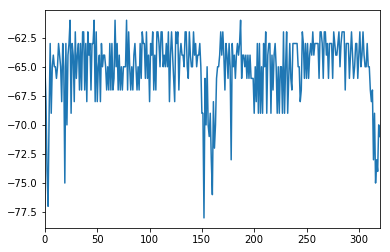

In [4]:
pd.Series(t01_t1['Be07']).plot()

In [7]:
def plotear(data,pos):
    beacons = ['Be07','Be08','Be09','Be10','Be11']
    for beacon in beacons:
        data_f = data[beacon][0:250]
        tkavg = pd.Series([data_f.mean() for i in range(250)])
        df = pd.concat([data_f,tkavg], axis=1, keys=['Take 1','Take 1 avg'])
        plt.figure()
        
        fig = df.plot(lw=0.5, markersize=0.4, title='RSSI Behaviour using '+beacon, style=['b','r-']);
        fig2 = fig.get_figure()
        fig.set_xlabel("# of samples");
        fig.set_ylabel("RSSI values (dBm)");
        fig.set_ylim(-94,-62)
        #fig.set_xlim(0,225)
        output_dir = 'resultsRPEntrenamiento/'+beacon+'/'+str(pos+1) 
        mkdir_p(output_dir)
        plt.savefig(output_dir+'/'+beacon+'.eps',format='eps',dpi=1000)
        plt.close(fig2)

In [8]:
ruta = './../nuevosManuelBeacons/Raspberri/Tx_0x04/test' # num+.csv
for it in range(15):
    ruta_f = ruta+str(it+1)+'.csv'
    data = pd.read_csv(ruta_f,names=['Pos','Be07','Be08','Be09','Be10','Be11'])
    plotear(data,it)

/home/jeslev/anaconda3/lib/python3.6/site-packages/matplotlib/pyplot.py:524: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  max_open_warning, RuntimeWarning)


### Arma tabla de Raspberry Pi 2, Tx=4

In [11]:
def plotear2(data,pos):
    beacons = ['Be07','Be08','Be09','Be10','Be11']
    print('--- Sector '+str(pos+1))
    for beacon in beacons:
        data_f = data[beacon][0:250]
        mn = data_f.mean()
        std = data_f.std()
        m = data_f.min()
        M = data_f.max()
        print('*'+beacon+': ')
        print('Mean: '+str(mn))
        print('Std: '+str(std))
        print('Min: '+str(m))
        print('Max: '+str(M))
        

In [12]:
ruta = './../nuevosManuelBeacons/Raspberri/Tx_0x04/test' # num+.csv
for it in range(15):
    ruta_f = ruta+str(it+1)+'.csv'
    data = pd.read_csv(ruta_f,names=['Pos','Be07','Be08','Be09','Be10','Be11'])
    plotear2(data,it)

--- Sector 1
*Be07: 
Mean: -65.184
Std: 2.811005336888576
Min: -78
Max: -61
*Be08: 
Mean: -59.628
Std: 0.723678687936501
Min: -62
Max: -57
*Be09: 
Mean: -72.608
Std: 3.751082307000951
Min: -88
Max: -66
*Be10: 
Mean: -62.552
Std: 3.745853932916632
Min: -74
Max: -57
*Be11: 
Mean: -68.724
Std: 3.5363607550076432
Min: -82
Max: -63
--- Sector 2
*Be07: 
Mean: -60.172
Std: 0.7325040948663596
Min: -62
Max: -58
*Be08: 
Mean: -62.528
Std: 3.2066096397170174
Min: -68
Max: -57
*Be09: 
Mean: -74.952
Std: 5.734915257616992
Min: -88
Max: -67
*Be10: 
Mean: -63.376
Std: 2.5449027723042614
Min: -67
Max: -58
*Be11: 
Mean: -67.784
Std: 0.846291223717558
Min: -69
Max: -65
--- Sector 3
*Be07: 
Mean: -68.736
Std: 1.8525744596409786
Min: -75
Max: -64
*Be08: 
Mean: -73.576
Std: 3.719619102147457
Min: -86
Max: -68
*Be09: 
Mean: -75.476
Std: 3.840366866678584
Min: -84
Max: -68
*Be10: 
Mean: -64.388
Std: 2.8308143775529753
Min: -74
Max: -60
*Be11: 
Mean: -73.576
Std: 4.531485567204549
Min: -89
Max: -65
--- Sector